In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df = pd.read_csv("./data/iris.csv")
print(df)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
feature_count = df.shape[1] - 1
rows_list = []
for i in range(len(df)):
    new_row = np.array(df.iloc[i,0:feature_count])
    rows_list.append(new_row)
    
x = np.array(rows_list)
y = np.array(df.iloc[:,feature_count])
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
n = len(y)
randy = np.random.default_rng()
idx = np.arange(n)
randy.shuffle(idx)

## Splits the data into 80% training and 20% validation
train_idx = idx[:int(n*.8)]
val_idx = idx[int(n*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

training_lenth = len(x_train)
validation_length = len(x_val)
print(f"The training data has {training_lenth} observations.")
print(f"The validation data has {validation_length} observations.")

The training data has 120 observations.
The validation data has 30 observations.


In [5]:
sns.set_theme(palette="flare")
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

## Visualize the Training Data

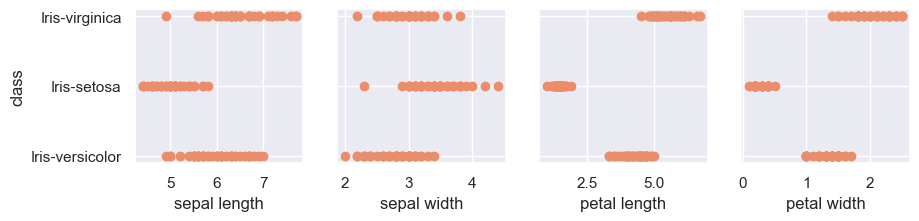

In [8]:
## plot the data from the first four features in side by side graphs
columns = df.columns.tolist()
x_features = columns[:feature_count]
y_feature = columns[feature_count]

fig, ax=plt.subplots(1,4,  figsize=(10,2),  sharey=True)

for i in range(4):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel(y_feature)
plt.show()

In [9]:
print(df["class"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [10]:
## plots classification data using the first two features as the x y axis
def plot_data(X, y, ax, s=60, loc='best' ):

    setosa = y == 'Iris-setosa'
    veriscolour = y == 'Iris-versicolor'
    virginica = y == 'Iris-virginica'
    setosa = setosa.reshape(-1,)
    veriscolour = veriscolour.reshape(-1,)
    viginica = virginica.reshape(-1,)

    ax.scatter(X[setosa, 0], X[setosa, 1], marker='o', s=s, label="setosa")
    ax.scatter(X[veriscolour, 0], X[veriscolour, 1], marker='p', s=s, label="veriscolour", lw=3)
    ax.scatter(X[virginica, 0], X[virginica, 1], marker='*', s=s, label="virginica", lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

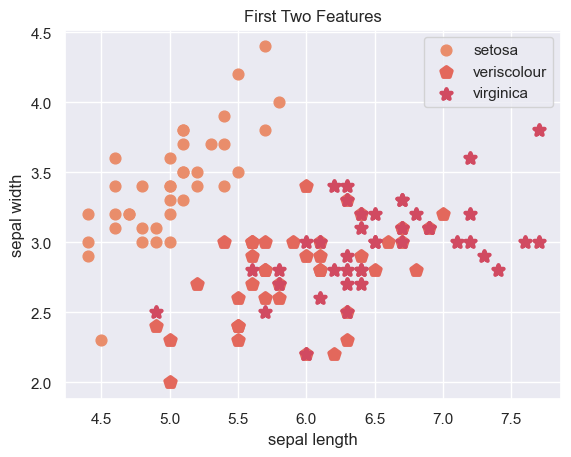

In [12]:
fig, ax = plt.subplots()
plot_data(x_train, y_train, ax, s=60)
x_label,y_label = x_features[0:2]
plt.ylabel(y_label) 
plt.xlabel(x_label)
plt.title("First Two Features")
plt.legend(loc="upper right")
plt.show()

## Create a Neural Net Model

In [13]:
## Scale and Normalize the Data
## Convert the data in x_train to a 32 float instead of a 64 float
x_train = x_train.astype('float32')
abby = tf.keras.layers.Normalization()
abby.adapt(x_train)
x_train_norm = abby(x_train)

In [14]:
## Encode the classifcation labels to integers for the model
cody = LabelEncoder()
y_train_encoded = cody.fit_transform(y_train)

In [16]:
print(y_train_encoded)
print(cody.classes_)

[1 0 0 2 1 2 1 1 0 0 2 1 2 1 0 1 2 1 1 2 0 2 1 1 2 0 1 1 1 0 2 0 2 1 2 1 0
 2 1 0 0 2 1 0 1 1 1 2 2 1 2 2 0 0 0 0 2 0 0 2 0 1 0 1 2 0 1 0 2 1 2 0 1 2
 0 2 0 0 1 0 0 0 2 2 2 2 1 1 1 2 1 1 0 2 2 2 1 2 0 2 0 2 1 2 0 2 0 1 2 0 1
 1 1 2 1 0 0 2 1 2]
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [17]:
## Create a Model
## Adjust the number of layers, number of neurons, activation type, and layer type
## For oftmax (multiclassification) models, the output layer must have the same number of neurons as the number of classes

Model = Sequential([
    Dense(units=8, activation='relu'),
    Dense(units=3, activation='softmax')
])

In [18]:
# Compile the model
Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Fit the model
history = Model.fit(x_train_norm, y_train_encoded, epochs=50, batch_size=1024, validation_split=0.2)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8750 - loss: 0.3484 - val_accuracy: 0.9167 - val_loss: 0.2975
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8750 - loss: 0.3478 - val_accuracy: 0.9167 - val_loss: 0.2970
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8750 - loss: 0.3472 - val_accuracy: 0.9167 - val_loss: 0.2964
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8750 - loss: 0.3466 - val_accuracy: 0.9167 - val_loss: 0.2958
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8750 - loss: 0.3460 - val_accuracy: 0.9167 - val_loss: 0.2953
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8750 - loss: 0.3454 - val_accuracy: 0.9167 - val_loss: 0.2947
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8750 - loss: 0.3447 - val_accuracy: 0.9167 - val_loss: 0.2942
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8750 - loss: 0.3441 - val_accuracy: 0.9167 - val_loss: 0.2936


In [29]:
x_val = x_val.astype('float32')
x_val_norm = abby(x_val)
y_prediction = Model.predict(x_val_norm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [30]:
print(y_prediction[0:20])

[[9.86064672e-01 1.12525113e-02 2.68283207e-03]
 [1.68163270e-01 7.32538402e-01 9.92983133e-02]
 [9.35140312e-01 5.78748733e-02 6.98482990e-03]
 [7.85417631e-02 7.51992762e-01 1.69465467e-01]
 [4.91642253e-03 1.77366763e-01 8.17716837e-01]
 [4.45962930e-03 4.33076799e-01 5.62463582e-01]
 [5.03582805e-02 6.07049346e-01 3.42592359e-01]
 [5.25269599e-04 1.42830119e-01 8.56644571e-01]
 [9.35140312e-01 5.78748733e-02 6.98482990e-03]
 [2.00213119e-02 3.32191348e-01 6.47787333e-01]
 [9.90569472e-01 7.81743694e-03 1.61307992e-03]
 [9.95237589e-01 4.08835523e-03 6.73985749e-04]
 [5.99985421e-02 7.52171099e-01 1.87830299e-01]
 [9.19429183e-01 7.30189309e-02 7.55181350e-03]
 [2.70996499e-03 1.49123341e-01 8.48166704e-01]
 [9.57370639e-01 3.44892666e-02 8.14016443e-03]
 [1.15935747e-02 3.81596178e-01 6.06810272e-01]
 [2.94367247e-03 1.04889616e-01 8.92166674e-01]
 [9.75766718e-01 2.05654129e-02 3.66781047e-03]
 [9.86333549e-01 1.10979825e-02 2.56840326e-03]]


In [31]:
##Find the predicted class index for each sample (the class with the highest probability).
y_predicted_classes = np.argmax(y_prediction, axis=1)
print(y_predicted_classes)

[0 1 0 1 2 2 1 2 0 2 0 0 1 0 2 0 2 2 0 0 2 1 2 0 2 1 1 0 0 1]


In [33]:
##Convert the predicted class indices back to string labels
y_predicted_classes = cody.inverse_transform(y_predicted_classes)
print(y_predicted_classes)

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor']


## Look at the Results

In [34]:
print(y_val.shape)
print(y_predicted_classes.shape)

(30,)
(30,)


In [35]:
fig_newton = np.array([y_val,y_predicted_classes])

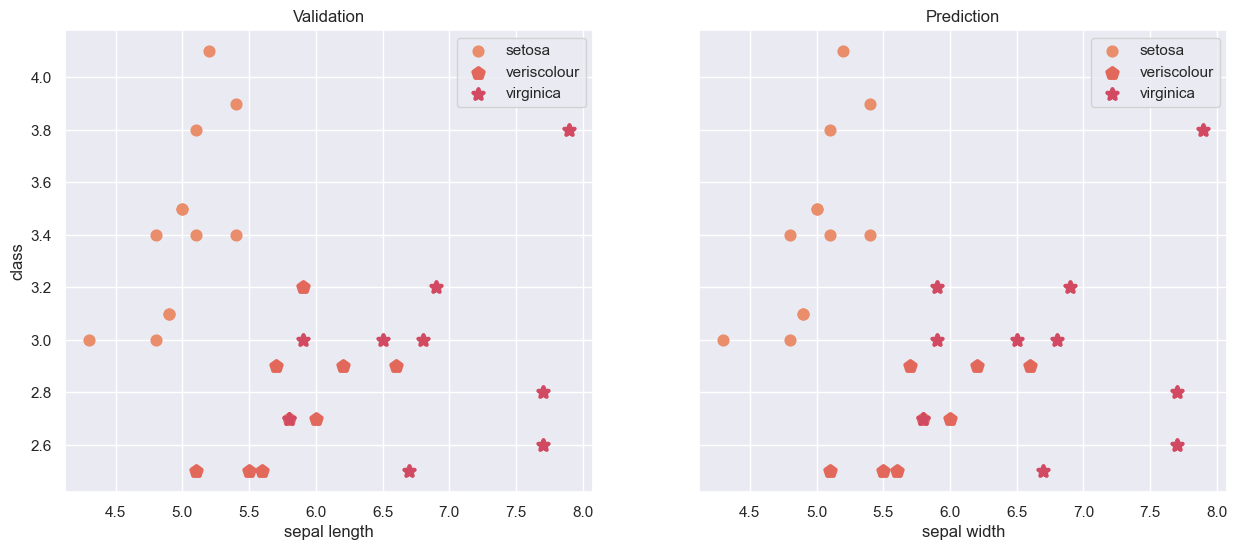

In [36]:
x_titles = ['Validation', 'Prediction']

fig, ax=plt.subplots(1,2,  figsize=(15,6),  sharey=True)

for i in range(2):
    y=fig_newton[i]
    x=x_val

    setosa = y == 'Iris-setosa'
    veriscolour = y == 'Iris-versicolor'
    virginica = y == 'Iris-virginica'
    setosa = setosa.reshape(-1,)
    veriscolour = veriscolour.reshape(-1,)
    viginica = virginica.reshape(-1,)

    ax[i].scatter(x[setosa, 0], x[setosa, 1], marker='o', s=60, label="setosa")
    ax[i].scatter(x[veriscolour, 0], x[veriscolour, 1], marker='p', s=60, label="veriscolour", lw=3)
    ax[i].scatter(x[virginica, 0], x[virginica, 1], marker='*', s=60, label="virginica", lw=3)
    ax[i].legend(loc='best')
    ax[i].set_xlabel(x_features[i])
    ax[i].set_title(x_titles[i])
ax[0].set_ylabel(y_feature)
plt.show()

## Confusion Matrix

In [37]:
cm = confusion_matrix(y_val, y_predicted_classes)

In [38]:
class_labels = cody.classes_

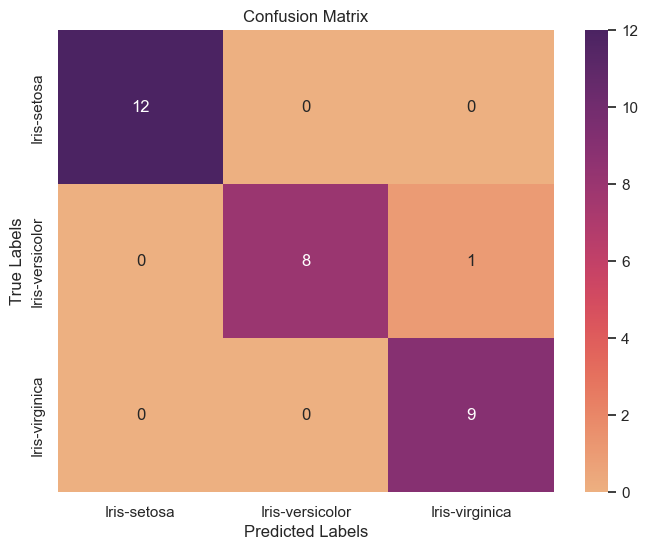

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [40]:
print(classification_report(y_val, y_predicted_classes, target_names=class_labels, zero_division=0))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



## Calculate the percentage of correct results

In [41]:
matches = y_val == y_predicted_classes  # This returns a boolean array

# Calculate the percentage of matches
percentage_match = np.sum(matches) / len(y_val) * 100

print(f"Percentage of matching elements: {percentage_match}%")

Percentage of matching elements: 96.66666666666667%


## Conclusions

With 500 training epochs, and a loss of 0.3194, I got a 97% accuracy and 97% F1 score. <br>
I used a batch size of 1024.

This dataset is highly predicable, and the multi-class classifcation is well suited for it. <br>
There is a high signal to noise ratio; it has strong clear patterns with minimal noise or variablility. <br>
I think it's linearly separable; the classes can be separated with a linear boundary, such as in the plot of the first two features, I could pretty easily drawn a line around the datapoints that represented different classes.  <br>
The class imbalance is very low. I think the three classes were pretty evenly represented in the data. <br>
There were few outliers or anomalies. <br>
There was low dimensionality and the features were all informative and non-redundant. There were only four features, and I didn't have to wonder if one of them was irrelevant and confusing the model. 
